A correctness analysis of the algorithm was conducted in this Jupyter Notebook. The experiments evaluated whether the implementation properly applied L1 regularization.

In [33]:
from logreg_ccd import LogRegCCD
import numpy as np
from scipy.special import expit
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Setting true values of beta

In [2]:
def generate_logistic_data(n_samples=10000, n_features=20, n_informative=10):
    beta_true = np.zeros(n_features)
    beta_true[:n_informative] = 1

    X = np.random.randn(n_samples, n_features)

    logits = X @ beta_true
    pi = expit(logits)
    y = np.random.binomial(1, pi, size=n_samples)

    return X, y, beta_true

In [3]:
logreg_ccd = LogRegCCD()
X_train, y_train, beta_true = generate_logistic_data()
X_valid, y_valid, _ = generate_logistic_data()
logreg_ccd.fit(X_train, y_train, X_valid, y_valid, np.logspace(-4, 0, 100))
logreg_ccd.best_beta

array([ 0.5004    ,  0.49000589,  0.5066397 ,  0.44220109,  0.45898358,
        0.47474319,  0.47461588,  0.46001358,  0.44395273,  0.47724764,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ])

### Lambda = 0

In [5]:
logreg_ccd = LogRegCCD()
X_train, y_train, beta_true = generate_logistic_data()
X_valid, y_valid, _ = generate_logistic_data()
logreg_ccd.fit(X_train, y_train, X_valid, y_valid, [0])
logreg_ccd.best_beta

array([ 5.04700000e-01,  9.55347254e-01,  9.00182770e-01,  9.82593051e-01,
        9.25964018e-01,  9.34005744e-01,  9.22681673e-01,  8.86482837e-01,
        1.02106452e+00,  1.00893621e+00,  8.25705372e-04,  8.58576523e-03,
        1.76663547e-02,  2.83396483e-02,  2.75740965e-02,  7.67250225e-03,
        2.02090874e-02, -3.91529064e-02, -3.83349086e-02,  2.89794554e-02])

## Log-Loss history

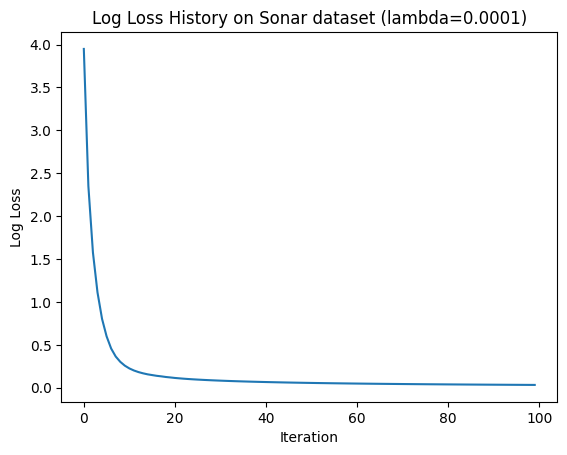

In [ ]:
sonar = pd.read_csv('data/preprocessed_sonar.csv', header=0)
sonar_labels = pd.read_csv('data/sonar_labels.csv', header=0)
X = sonar.to_numpy()
y = sonar_labels.to_numpy().flatten()
logreg_ccd = LogRegCCD(max_iter=100)
X = logreg_ccd.prepare_train_data(X)
_, _, log_loss_history = logreg_ccd.fit(X, y, X, y, [0.0001], loss_history=True)
plt.plot(log_loss_history)
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss History on Sonar dataset (lambda=0.0001)')
plt.savefig('charts/log_loss_history_sonar.png', dpi=300)
plt.show()